In [1]:
import pandas as pd
from pandas_datareader import data as web

In [2]:
pip install mplfinance

     |████████████████████████████████| 61kB 3.1MB/s 


In [3]:
pip install yfinance

     |████████████████████████████████| 5.5MB 6.2MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=109fdd7ba43372e1d795d2e94aafbe6b94c72382f6a31343c7fa2d8eef677787
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd
import matplotlib.dates as mpl_dates
import numpy as np
from datetime import date
import seaborn as sns

In [5]:
stocks = ['ACC.NS', 'ABBOTINDIA.NS', 'ADANIGREEN.NS', 'ADANIPORTS.NS', 'ADANITRANS.NS', 'ALKEM.NS', 'AMBUJACEM.NS', 'ASIANPAINT.NS', 'AUROPHARMA.NS', 'DMART.NS', 'AXISBANK.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS', 'BAJAJFINSV.NS', 'BAJAJHLDNG.NS', 'BANDHANBNK.NS', 'BANKBARODA.NS', 'BERGEPAINT.NS', 'BPCL.NS', 'BHARTIARTL.NS', 'BIOCON.NS', 'BOSCHLTD.NS', 'BRITANNIA.NS', 'CADILAHC.NS', 'CIPLA.NS', 'COALINDIA.NS', 'COLPAL.NS', 'CONCOR.NS', 'DLF.NS', 'DABUR.NS', 'DIVISLAB.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GAIL.NS', 'GICRE.NS', 'GODREJCP.NS', 'GRASIM.NS', 'HCLTECH.NS', 'HDFCAMC.NS', 'HDFCBANK.NS', 'HDFCLIFE.NS', 'HAVELLS.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS', 'HINDPETRO.NS', 'HINDUNILVR.NS', 'HINDZINC.NS', 'HDFC.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS', 'ITC.NS', 'IOC.NS', 'IGL.NS', 'INDUSTOWER.NS', 'INDUSINDBK.NS', 'NAUKRI.NS', 'INFY.NS', 'INDIGO.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS', 'LTI.NS', 'LT.NS', 'LUPIN.NS', 'M&M.NS', 'MARICO.NS', 'MARUTI.NS', 'MOTHERSUMI.NS', 'MUTHOOTFIN.NS', 'NMDC.NS', 'NTPC.NS', 'NESTLEIND.NS', 'ONGC.NS', 'OFSS.NS', 'PETRONET.NS', 'PIDILITIND.NS', 'PEL.NS', 'PFC.NS', 'POWERGRID.NS', 'PGHH.NS', 'PNB.NS', 'RELIANCE.NS', 'SBICARD.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SIEMENS.NS', 'SBIN.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TATACONSUM.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TECHM.NS', 'TITAN.NS', 'TORNTPHARM.NS', 'UPL.NS', 'ULTRACEMCO.NS', 'UBL.NS', 'MCDOWELL-N.NS', 'WIPRO.NS']

In [6]:
def find_doji(stocks,percent=1):
    for p in stocks:
        plotchart = False
        df = yf.download(tickers=p, 
                   period="1d", 
                   interval="5m")
        df['signal']=np.nan
        mc = mpf.make_marketcolors(up='#00675b',down='#d50000',edge='inherit',wick='inherit',volume='inherit')
        s  = mpf.make_mpf_style(marketcolors=mc,y_on_right=True,gridstyle='-')
        for i in range(-1,-20,-1):
            a = (df.Close[i]*0.0003)
            b = (df.Open[i]*0.0003)
            diff = abs(df.Close[i]-df.Open[i])
            if diff<=0 or diff<=a or diff<=b:
                df.signal[i] = df.High[i]+(df.High[i]*0.005)
                plotchart = True
        if plotchart:
            apdict = [mpf.make_addplot(df.signal,type='scatter',markersize=30)]
            fig, axes = mpf.plot(df,title=p[:-3], type='candlestick',style=s,volume=True, no_xgaps = True,figratio=(38,25),datetime_format='%d-%m',figscale=1.5,addplot=apdict,returnfig=True)

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


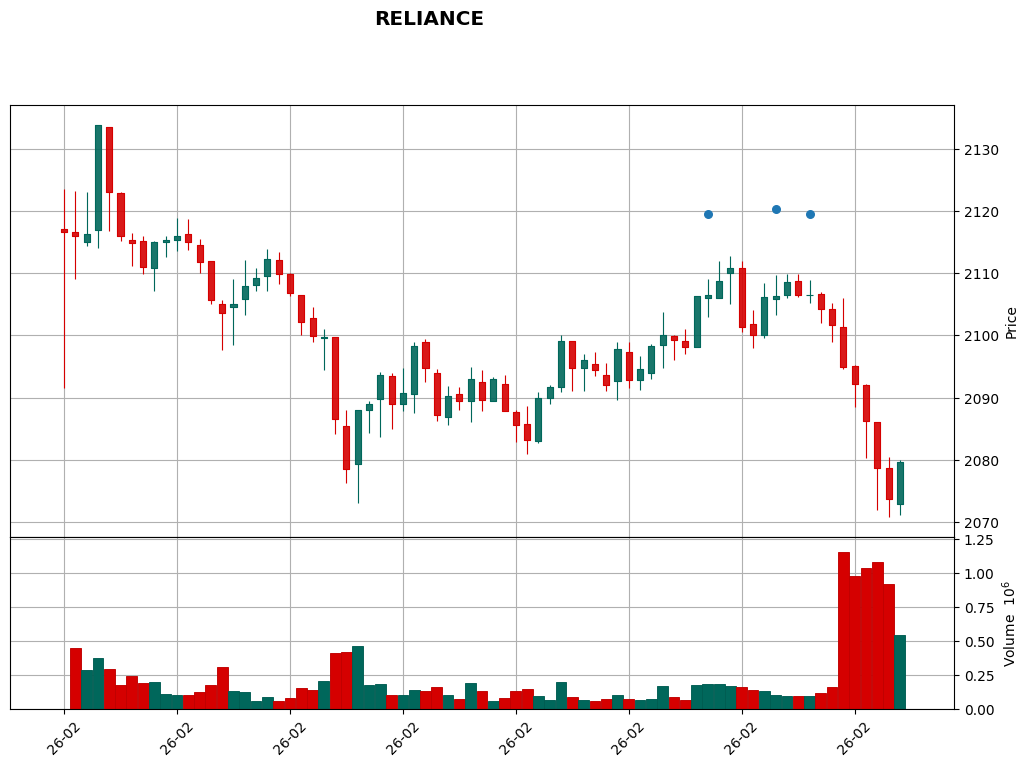

In [7]:
find_doji(['RELIANCE.NS'])